In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
!pip install pyarrow

In [3]:
raw_data = pd.read_feather('Sales_data.ftr')
sales_df = raw_data.copy()
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
sales_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
sales_df = sales_df.dropna(how = 'all')
sales_df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
sales_df.duplicated().sum()

618

In [8]:
sales_df[sales_df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [9]:
sales_df = sales_df.drop_duplicates()

In [10]:
sales_df.shape

(185687, 6)

In [11]:
sales_df[sales_df.duplicated()] 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
sales_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
sales_df['Order Date'][0]

'04/19/19 08:46'

In [14]:
'04/19/19 08:46'.split(' ')[0]

'04/19/19'

In [15]:
'04/19/19 08:46'.split(' ')[0].split('/')[0]

'04'

In [16]:
sales_df['Order Date'][0].split('/')[0]

'04'

In [17]:
def return_month(x):
    return x.split('/')[0]

In [18]:
sales_df['Month'] = sales_df['Order Date'].apply(return_month)

In [19]:
sales_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [20]:
sales_df['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [21]:
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [22]:
sales_df.shape

(185687, 7)

In [23]:
sales_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [24]:
sales_df['Month'] = pd.to_numeric(sales_df['Month'], errors='coerce')

# Now, convert the 'Month' column to float
sales_df['Month'] = sales_df['Month'].astype(float)

In [25]:
sales_df.dtypes

Order ID             object
Product              object
Quantity Ordered     object
Price Each           object
Order Date           object
Purchase Address     object
Month               float64
dtype: object

In [26]:
sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered'], errors='coerce')

sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each'], errors='coerce')

In [27]:
sales_df.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month               float64
dtype: object

In [28]:
sales_df['Sales'] = sales_df['Quantity Ordered'] * sales_df['Price Each']
sales_df.groupby(['Month'])['Sales']

In [29]:
sales_df['Sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: Sales, Length: 185687, dtype: float64

<Axes: xlabel='Month'>

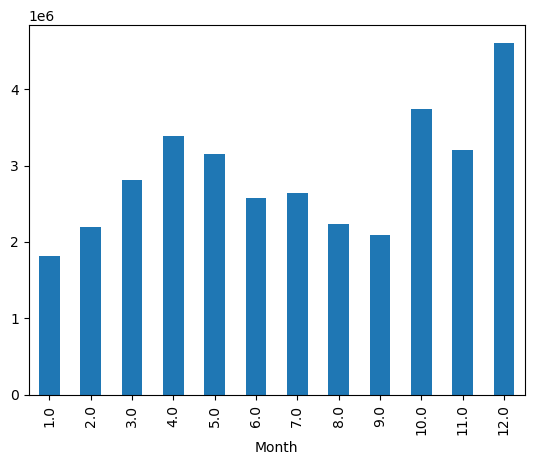

In [30]:
sales_df.groupby(['Month'])['Sales'].sum().plot(kind = 'bar')

In [31]:
sales_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00


In [32]:
sales_df['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [33]:
sales_df['Purchase Address'][0].split(',')[1]

' Dallas'

In [34]:
sales_df['city'] = sales_df['Purchase Address'].str.split(',').str.get(1)
sales_df['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185687, dtype: object

In [35]:
pd.value_counts(sales_df['city'])

city
 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: count, dtype: int64

<Axes: xlabel='city'>

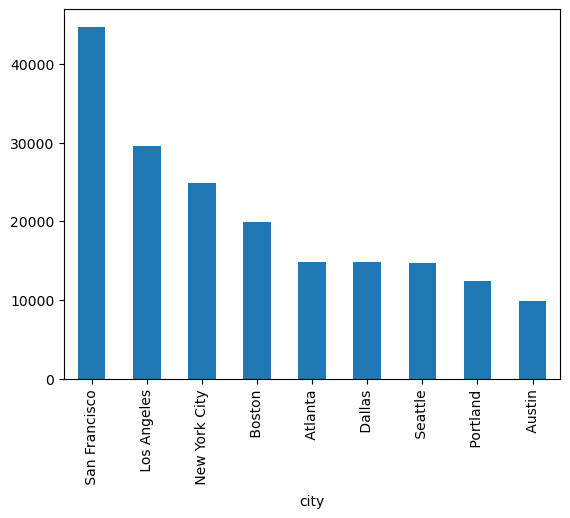

In [36]:
pd.value_counts(sales_df['city']).plot(kind = 'bar')

In [37]:
sales_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'city'],
      dtype='object')

In [38]:
count_df = sales_df.groupby(['Product']).agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'})

In [39]:
count_df = count_df.reset_index()
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126.0,109.99
1,27in 4K Gaming Monitor,6239.0,389.99
2,27in FHD Monitor,7541.0,149.99
3,34in Ultrawide Monitor,6192.0,379.99
4,AA Batteries (4-pack),27615.0,3.84
5,AAA Batteries (4-pack),30986.0,2.99
6,Apple Airpods Headphones,15637.0,150.00
7,Bose SoundSport Headphones,13430.0,99.99
8,Flatscreen TV,4813.0,300.00
9,Google Phone,5529.0,600.00


In [40]:
products = count_df['Product'].values

Text(0, 0.5, 'Avg price of product')

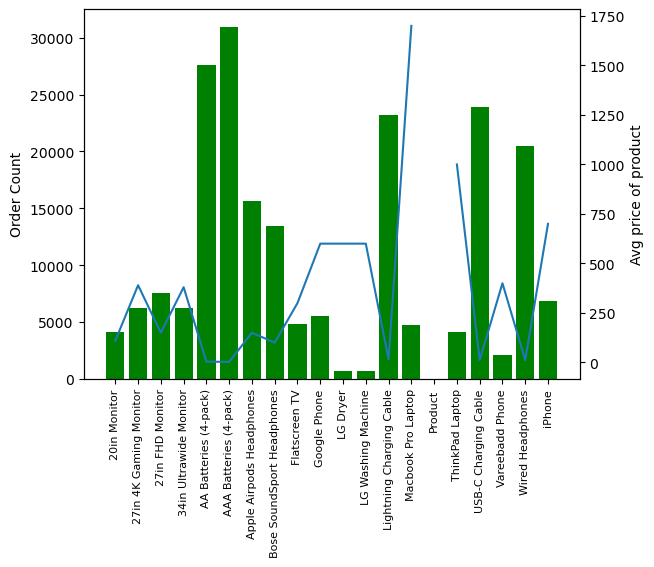

In [41]:
fig , ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(count_df['Product'] , count_df['Quantity Ordered'] , color='g')
ax2.plot(count_df['Product'] , count_df['Price Each'] )
ax1.set_xticklabels(products , rotation='vertical' , fontsize=8 )

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

In [42]:
sales_df['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [43]:
most_sold_product = sales_df['Product'].value_counts()[0:5].index

In [44]:
sales_df['Product'].isin(most_sold_product)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185687, dtype: bool

In [45]:
most_sold_product_df = sales_df[sales_df['Product'].isin(most_sold_product)]
most_sold_product_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4.0,11.95,San Francisco
8,176564,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4.0,11.95,Atlanta


In [46]:
most_sold_product_df.groupby(['Month', 'Product']).size()

Month  Product                 
1.0    AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2.0    AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3.0    AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4.0    AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5.0    AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [47]:
pivot = most_sold_product_df.groupby(['Month', 'Product']).size().unstack()

<Axes: xlabel='Month'>

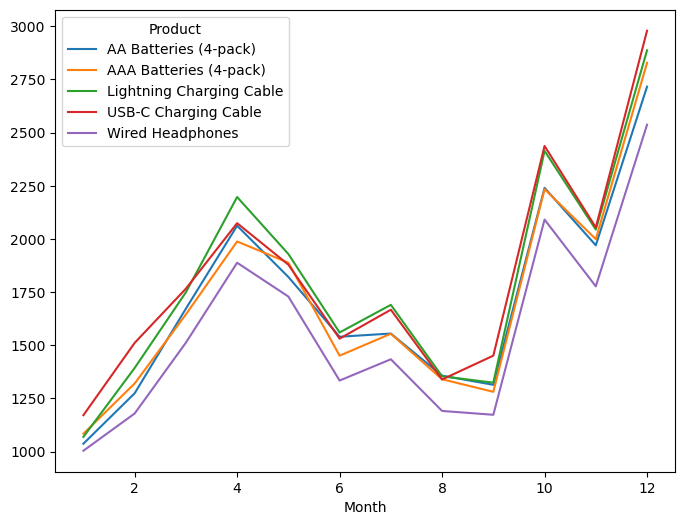

In [48]:
pivot.plot(figsize = (8,6))

In [49]:
sales_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'city'],
      dtype='object')

In [50]:
sales_df['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185687, dtype: object

In [51]:
duplicated_df = sales_df[sales_df['Order ID'].duplicated(keep = False)]
duplicated_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4.0,600.00,Los Angeles
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4.0,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2.0,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4.0,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9.0,3.84,Atlanta
186803,259314,Wired Headphones,1.0,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9.0,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2.0,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9.0,5.98,Atlanta
186841,259350,Google Phone,1.0,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9.0,600.00,San Francisco


In [52]:
duplicated_products_df = duplicated_df.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})
duplicated_products_df

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [62]:
no_dup_df = duplicated_products_df.drop_duplicates(subset = ['Order ID'])

In [63]:
no_dup_df.shape

(6879, 2)

<Axes: ylabel='count'>

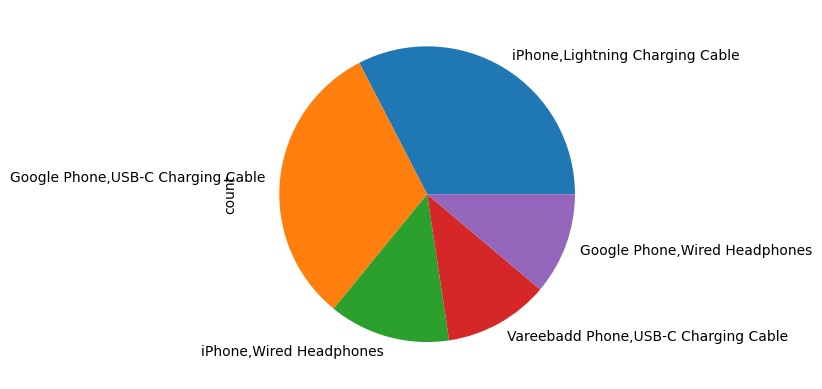

In [66]:
no_dup_df['grouped_products'].value_counts()[0:5].plot.pie()

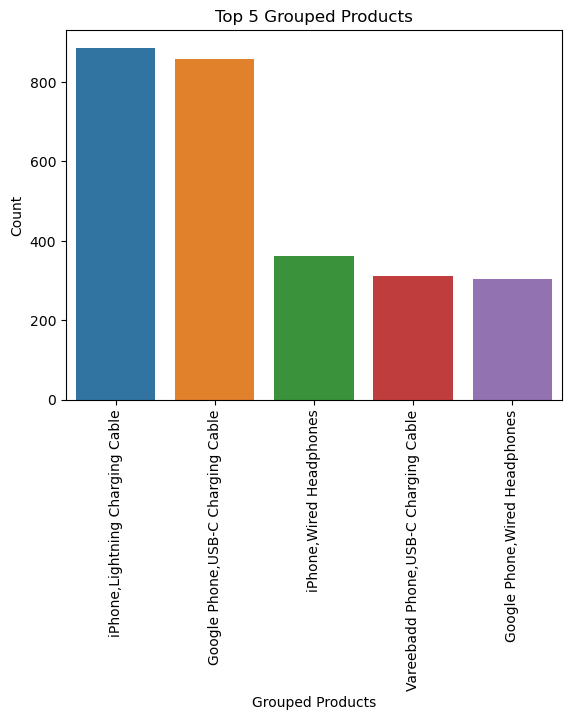

In [68]:
sns.countplot(data=no_dup_df, x='grouped_products', order=no_dup_df['grouped_products'].value_counts().index[:5])
plt.title('Top 5 Grouped Products')
plt.xlabel('Grouped Products')
plt.xticks(rotation= 'vertical')
plt.ylabel('Count')
plt.show()